In [2]:
import piplite
piplite.install('seaborn')

<PyodideTask pending name='Task-30' coro=<_install() running at /lib/python3.12/site-packages/piplite/piplite.py:109> cb=[WebLoop._decrement_in_progress()]>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Reading the CSV file.

In [37]:
df = pd.read_csv(
    'btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


## Plot DataFrame

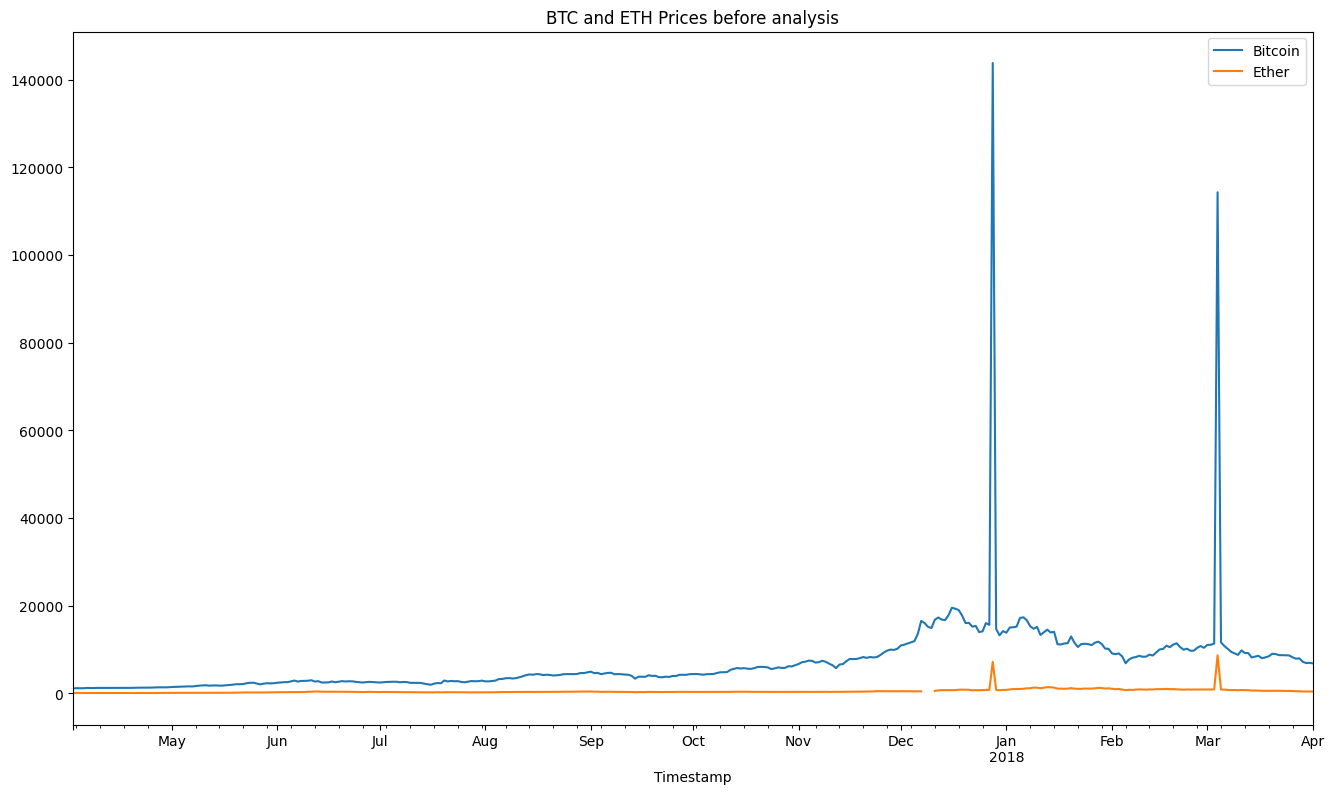

In [38]:
ax = df.plot(figsize=(16, 9), title='BTC and ETH Prices before analysis')

<Axes: xlabel='Timestamp'>

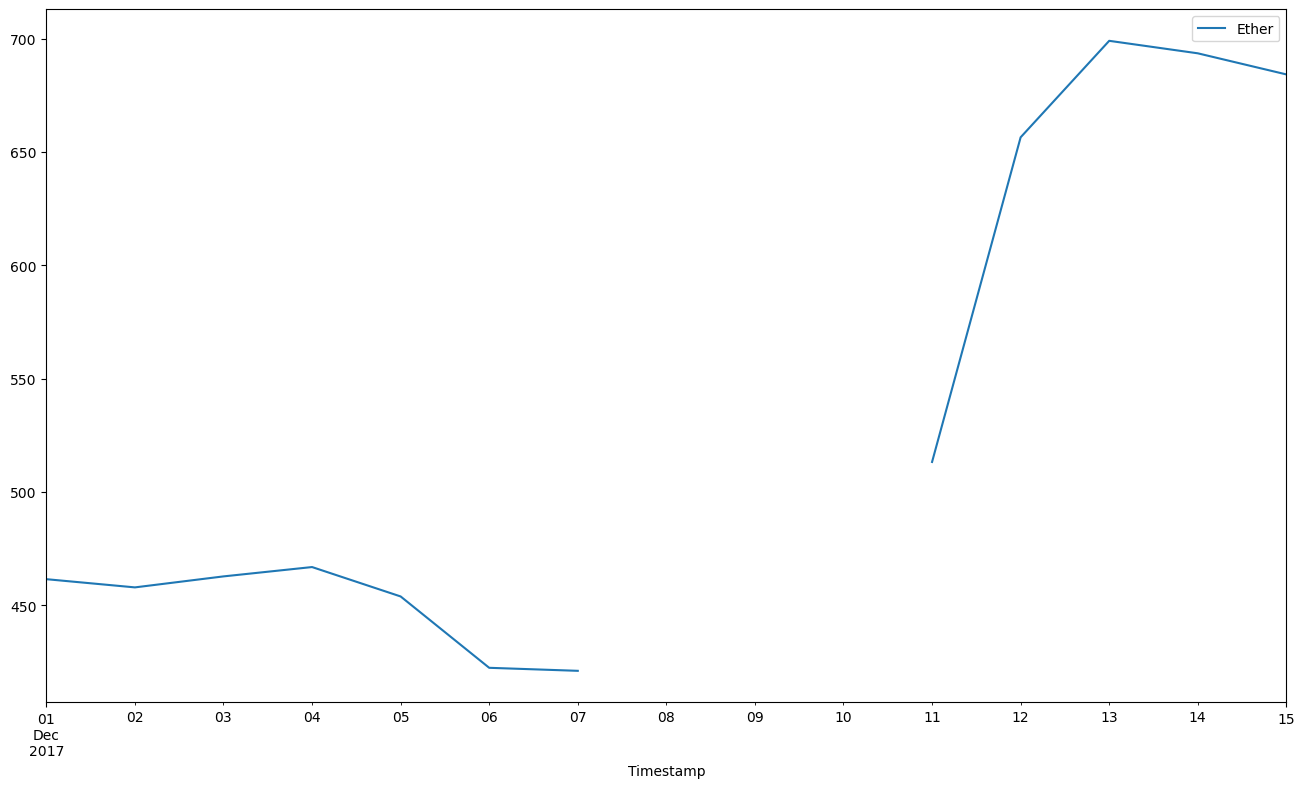

In [39]:
## Zooming in on the missing data of Ether
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [40]:
## Declaring these values as df_na
df_na = df.loc['2017-12': '2017-12-15']
## Check if any null values are present in this data set
df_na['Ether'].isna().values.any()

np.True_

In [41]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [42]:
df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')
## bfill will fill the values by copying the values that are after the NaN.


<ipython-input-42-d738eecaff54>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [43]:
df.fillna(method='bfill', inplace=True)

<ipython-input-43-168d8f9d469d>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


## Now lets look at the graph

<Axes: xlabel='Timestamp'>

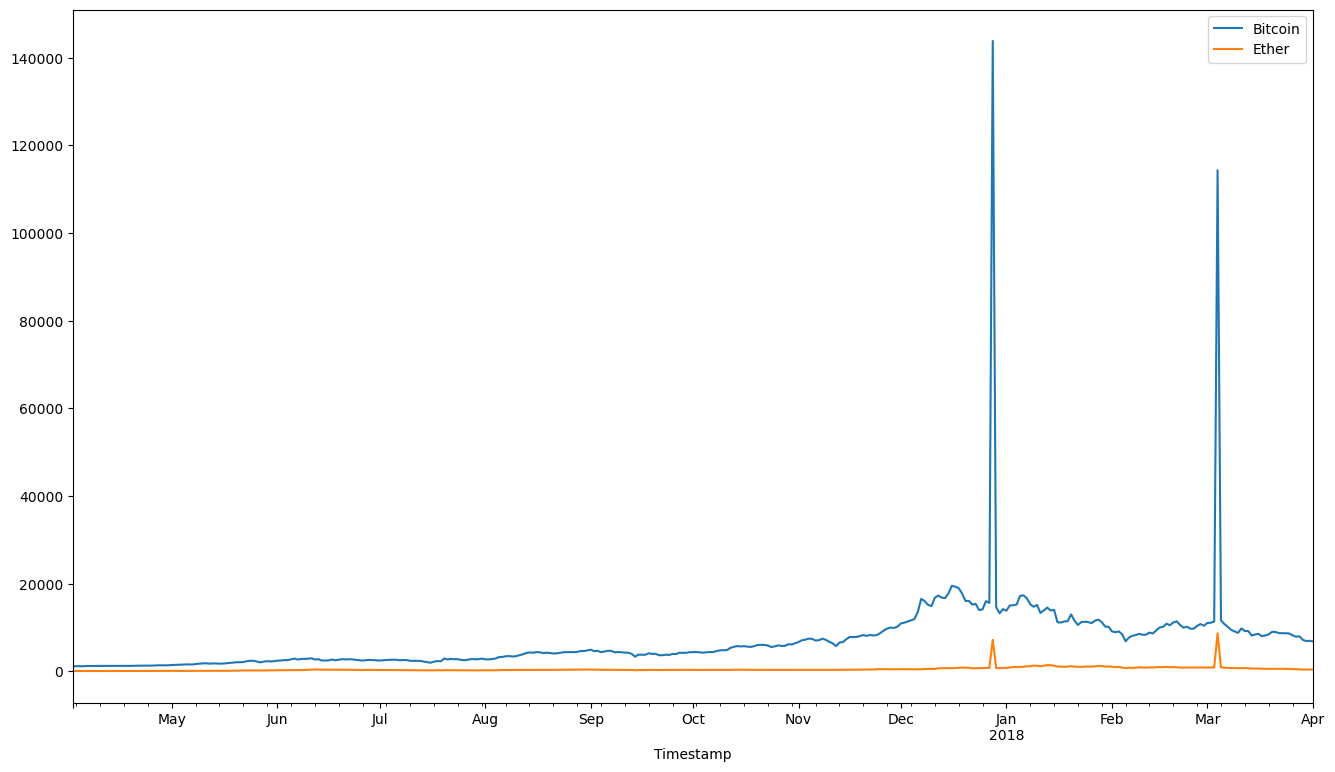

In [44]:
df.plot(figsize=(16, 9))

<Axes: xlabel='Timestamp'>

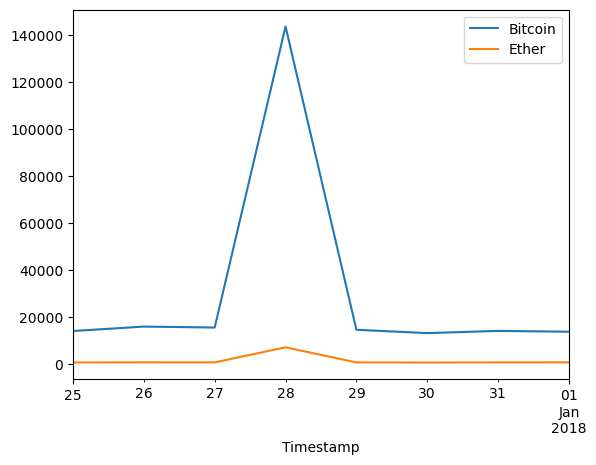

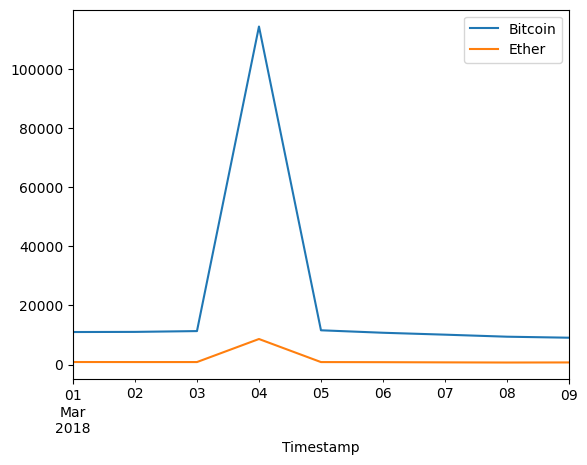

In [45]:
## Let's zoom in on the two spikes in the graph.
df['2017-12-25':'2018-01-01'].plot()
df['2018-03-01': '2018-03-09'].plot()

<Axes: xlabel='Timestamp'>

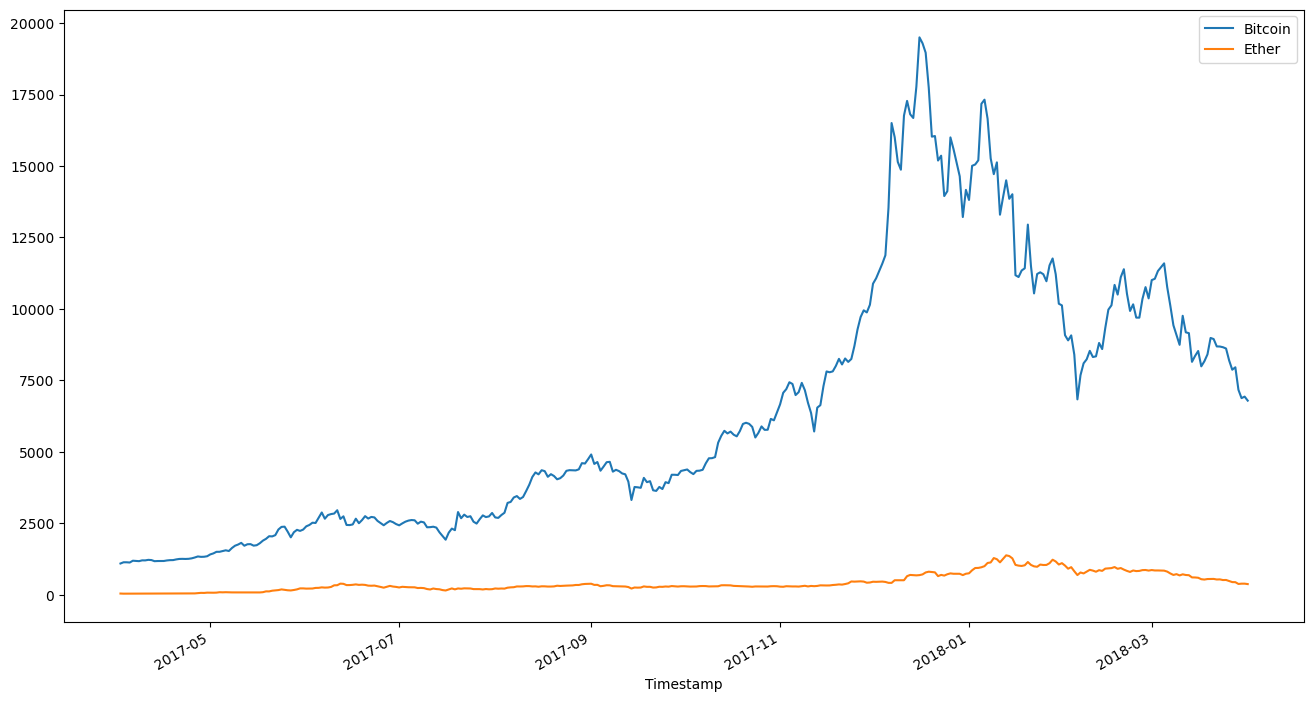

In [46]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
df_cleaned.plot(figsize=(16, 9))

## Clean Analysis

In [47]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [48]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [49]:
df_cleaned.median()

Bitcoin    4580.38748
Ether       309.32000
dtype: float64

## Visualizing Distribution

<Axes: ylabel='Frequency'>

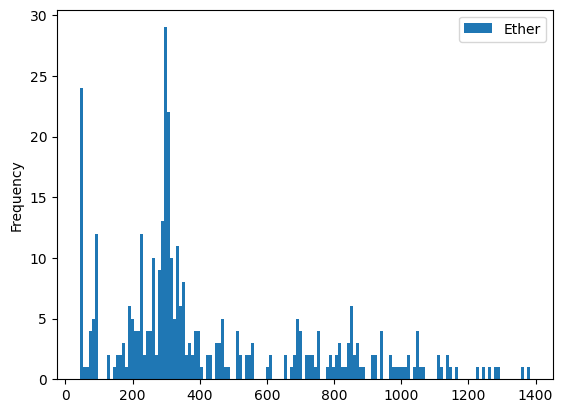

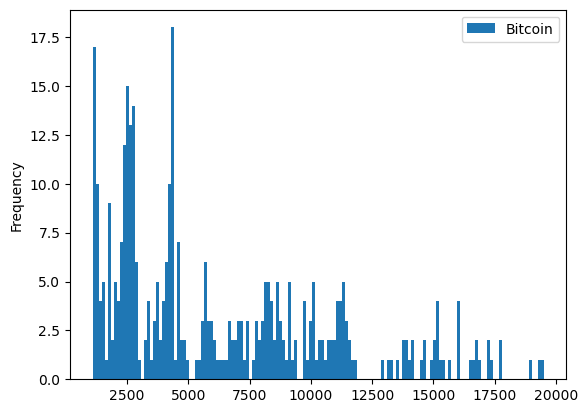

In [51]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)
## plot histograms for both ether and bitcoin

<Axes: xlabel='Ether', ylabel='Count'>

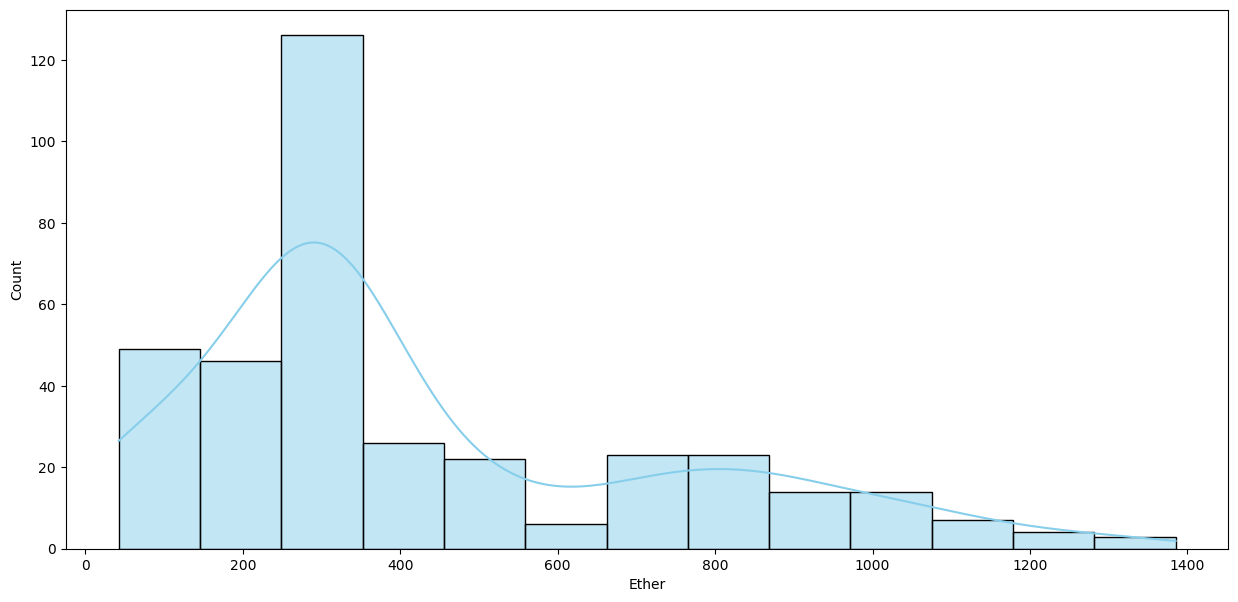

In [58]:
## Using Seaborn
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df_cleaned['Ether'], ax=ax, kde=True, color='skyblue', edgecolor='black')

<Axes: xlabel='Bitcoin', ylabel='Count'>

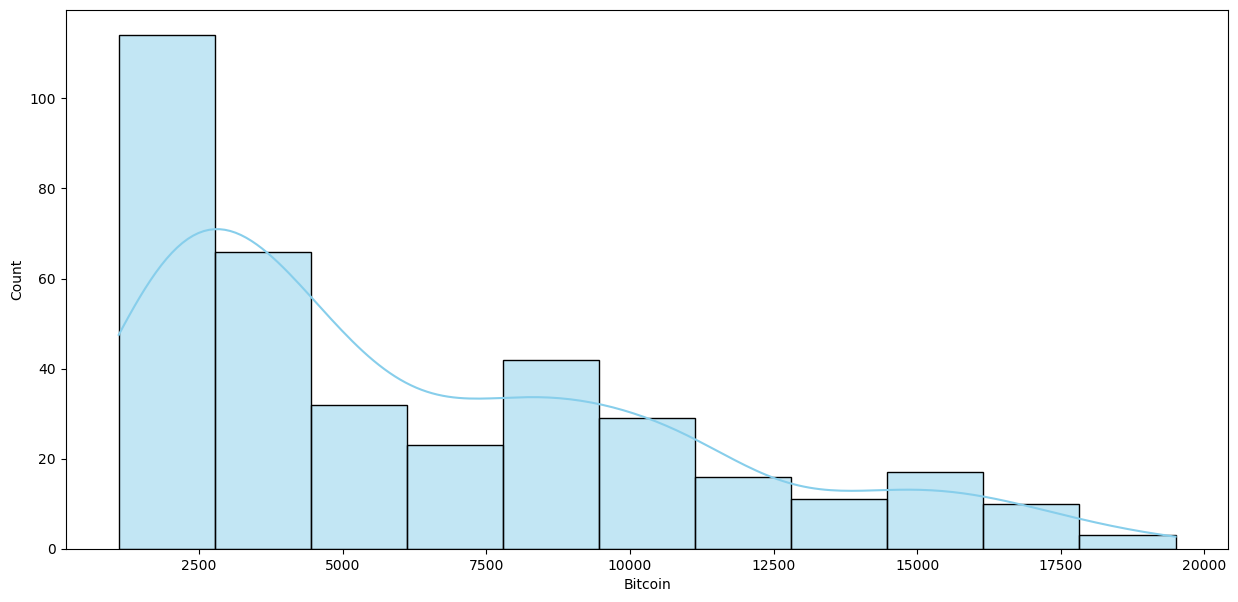

In [59]:
## for bitcoin
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df_cleaned['Bitcoin'], ax=ax, kde=True, color='skyblue', edgecolor='black')

## Visualizing bivariate distributions

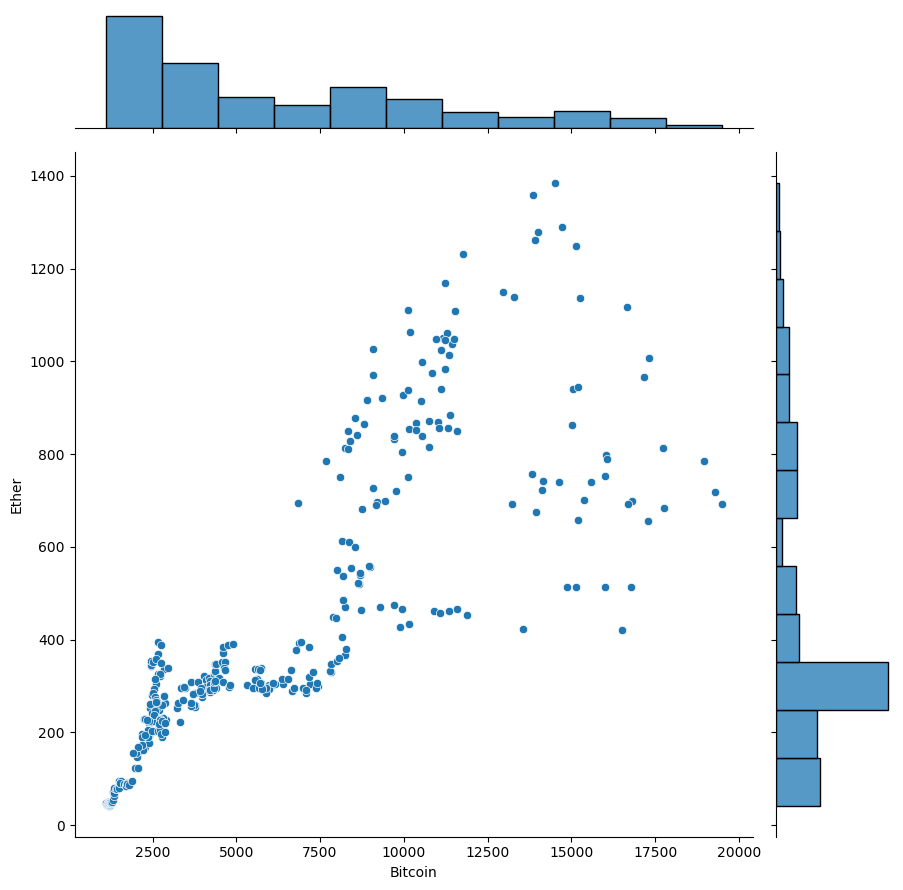

In [66]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, height=9)

<Axes: xlabel='Bitcoin', ylabel='Ether'>

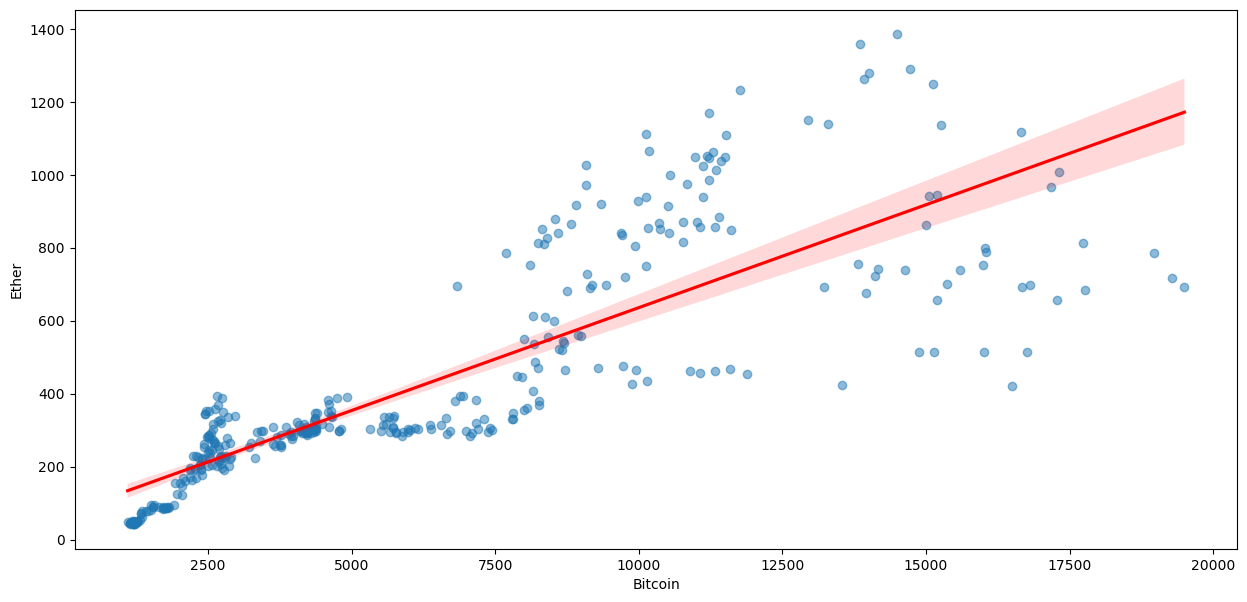

In [67]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.regplot(
    x="Bitcoin",
    y="Ether",
    data=df_cleaned,
    ax=ax,
    scatter_kws={"alpha": 0.5},   
    line_kws={"color": "red"}     
)

## Quantiles, quartiles and percentiles

In [68]:
df_cleaned['Bitcoin'].quantile(.2)

np.float64(2438.8627342857144)

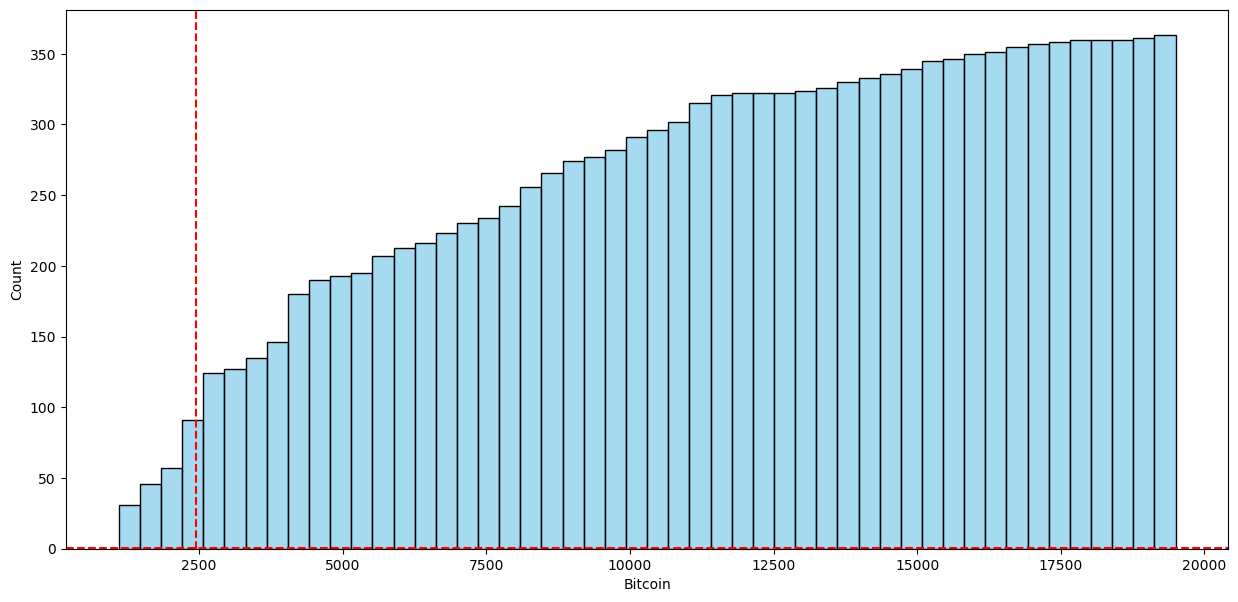

In [70]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.histplot(
    data=df_cleaned,
    x='Bitcoin',
    bins=50,
    cumulative=True,
    ax=ax,
    color='skyblue',
    edgecolor='black'
)

# 20th percentile line
quantile_20 = df_cleaned['Bitcoin'].quantile(0.2)
ax.axhline(0.2, color='red', linestyle='--')
ax.axvline(quantile_20, color='red', linestyle='--')

In [71]:
df_cleaned['Bitcoin'].quantile(.5)

np.float64(4580.387479999999)

In [75]:
df_cleaned['Bitcoin'].median()

np.float64(4580.387479999999)

## Dispersion

##### Range

In [76]:
df['Bitcoin'].max() - df['Bitcoin'].min()

np.float64(142706.6475416667)

In [77]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

np.float64(18399.51420833333)

###### Variance and SD

In [78]:
df_cleaned['Bitcoin'].std()

np.float64(4513.757662530282)

##### IQR

In [79]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

np.float64(6597.494147619047)

In [80]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

np.float64(6548.249242559523)

## Analytical analysis of Invalid Values

In [81]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

np.float64(6597.494147619047)

In [83]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.992317060834
Lower Limit: -6198.9842734153535


<Axes: xlabel='Bitcoin', ylabel='Count'>

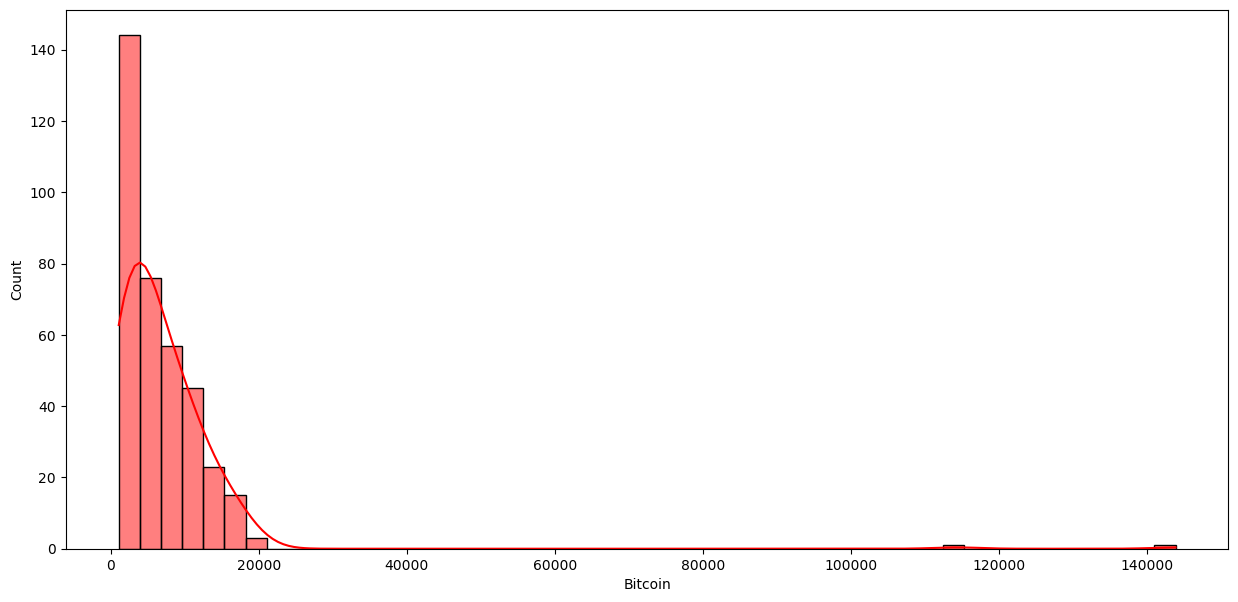

In [86]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(
    data=df,
    x='Bitcoin',
    bins=50,
    kde=True,            
    ax=ax,
    color='red',
    edgecolor='black'
)


## Cleaning invalid values analytically

<Axes: xlabel='Timestamp'>

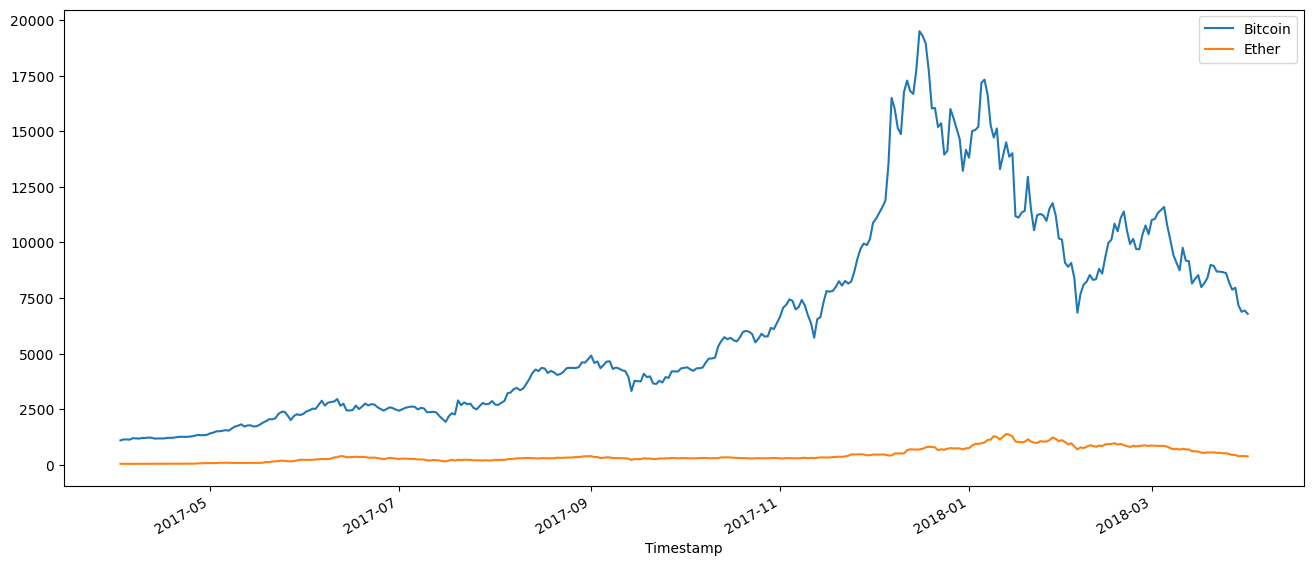

In [87]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

<Axes: xlabel='Timestamp'>

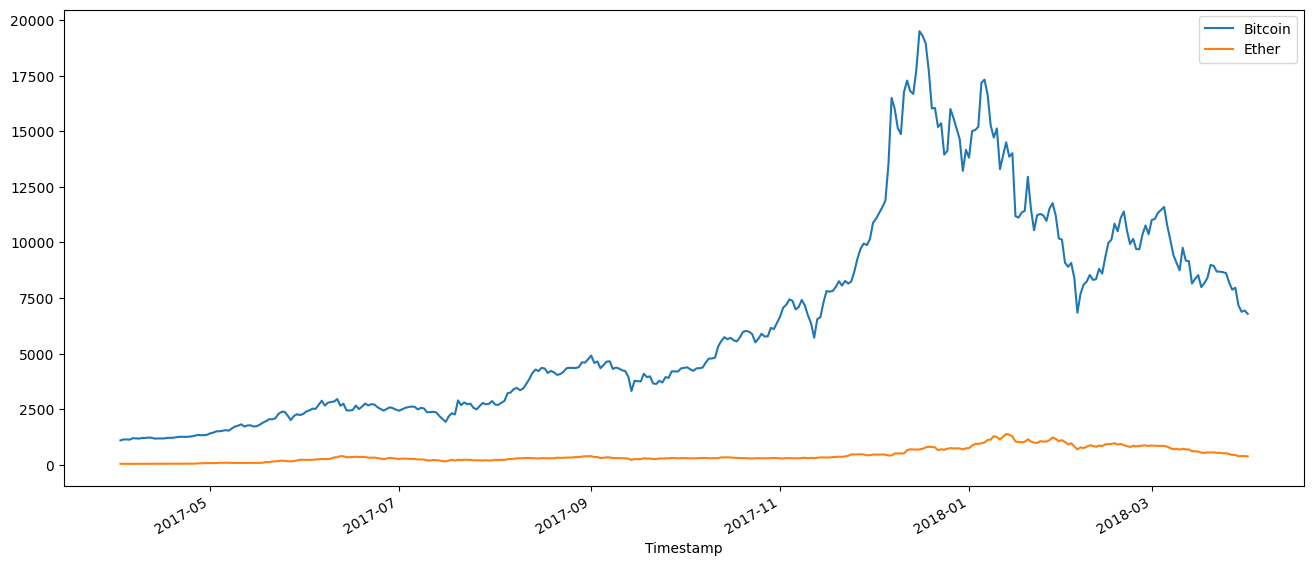

In [88]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))